# Exploring the trajectory of a single patient

### Import Python libraries

We first need to import some tools for working with data in Python. 
- NumPy is for working with numbers
- Pandas is for analysing data
- MatPlotLib is for making plots
- Sqlite3 to connect to the database

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

### Connect to the database

- We can use the sqlite3 library to connect to the MIMIC database
- Once the connection is established, we'll run a simple SQL query.

In [5]:
# Connect to the MIMIC database
conn = sqlite3.connect('C:/Users/mk5414/desktop/mimicdata.sqlite')

In [6]:
# Create our test query
test_query = """
SELECT subject_id, hadm_id, admittime, dischtime, admission_type, diagnosis
FROM admissions
"""

In [7]:
# Run the query and assign the results to a variable
test = pd.read_sql_query(test_query,conn)

In [8]:
# Display the first few rows
test.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,DIAGNOSIS
0,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,EMERGENCY,SEPSIS
1,40080,162107,2106-05-31 16:43:00,2106-06-05 01:18:00,EMERGENCY,CONGESTIVE HEART FAILURE
2,40084,195762,2173-01-31 22:11:00,2173-02-05 01:31:00,EMERGENCY,INTRACRANIAL HEMORRHAGE;OPEN FX
3,40116,157106,2150-02-19 00:12:00,2150-03-11 13:58:00,EMERGENCY,GASTROINTESTINAL BLEED
4,40120,146466,2120-01-27 20:41:00,2120-02-12 17:14:00,EMERGENCY,CONGESTIVE HEART FAILURE


### Load the chartevents data

- The chartevents table contains data charted at the patient bedside. It includes variables such as heart rate, respiratory rate, temperature, and so on.
- We'll begin by loading the chartevents data for a single patient.

In [9]:
query = """
SELECT de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0+0.5) as HOURS
  , di.label
  , de.value
  , de.valuenum
  , de.uom
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE de.icustay_id = 252522
ORDER BY charttime;
"""

ce = pd.read_sql_query(query,conn)


# OPTION 2: load chartevents from a CSV file
# ce = pd.read_csv('data/example_chartevents.csv', index_col='HOURSSINCEADMISSION')

In [10]:
# Preview the data
# Use 'head' to limit the number of rows returned
ce.head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,UOM
0,252522,1.0,Heart Rate,90,90.0,bpm
1,252522,1.0,Non Invasive Blood Pressure systolic,104,104.0,mmHg
2,252522,1.0,Non Invasive Blood Pressure diastolic,63,63.0,mmHg
3,252522,1.0,Non Invasive Blood Pressure mean,74,74.0,mmHg
4,252522,1.0,Respiratory Rate,28,28.0,insp/min


### Review the patient's heart rate

- We can select individual columns using the column name. 
- For example, if we want to select just the label column, we write **```ce.LABEL```** or alternatively **```ce['LABEL']```**

In [11]:
# Select a single column
ce['LABEL']

0                                     Heart Rate
1           Non Invasive Blood Pressure systolic
2          Non Invasive Blood Pressure diastolic
3               Non Invasive Blood Pressure mean
4                               Respiratory Rate
5                    O2 saturation pulseoxymetry
6                                     Heart Rate
7                        Heart rate Alarm - High
8                         Heart Rate Alarm - Low
9                               Respiratory Rate
10                   O2 saturation pulseoxymetry
11      Non-Invasive Blood Pressure Alarm - High
12       Non-Invasive Blood Pressure Alarm - Low
13                        Temperature Fahrenheit
14      O2 Saturation Pulseoxymetry Alarm - High
15       O2 Saturation Pulseoxymetry Alarm - Low
16                             Resp Alarm - High
17                              Resp Alarm - Low
18                              SpO2 Desat Limit
19                            Richmond-RAS Scale
20                  

- In a similar way, we can select rows from data using indexes. 
- For example, to select rows where the label is equal to 'Heart Rate', we would create an index using **```[ce.LABEL=='Heart Rate']```** 

In [187]:
# Select just the heart rate rows using an index
ce[ce.LABEL=='Heart Rate']

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,UOM
117,252522,11.0,Creatinine,.6,0.6,mg/dL
258,252522,24.0,Creatinine,.6,0.6,mg/dL
369,252522,35.0,Creatinine,.5,0.5,mg/dL
488,252522,48.0,Creatinine,.5,0.5,mg/dL
590,252522,59.0,Creatinine,.6,0.6,mg/dL
713,252522,72.0,Creatinine,.6,0.6,mg/dL
824,252522,83.0,Creatinine,.6,0.6,mg/dL
969,252522,96.0,Creatinine,.6,0.6,mg/dL
1078,252522,109.0,Creatinine,.7,0.7,mg/dL


### Plot 1: How did the patients heart rate change over time?

- Using the methods described above to select our data of interest, we can create our x and y axis values to create a time series plot of heart rate.

In [13]:
# Which time stamps have a corresponding heart rate measurement?
print ce.index[ce.LABEL=='Heart Rate']

Int64Index([   0,    6,   24,   30,   36,   58,   67,   77,   88,   95,
            ...
            1051, 1057, 1069, 1092, 1098, 1104, 1122, 1128, 1134, 1140],
           dtype='int64', length=116)


Text(0.5,1,u'Heart rate over time from admission to the intensive care unit')

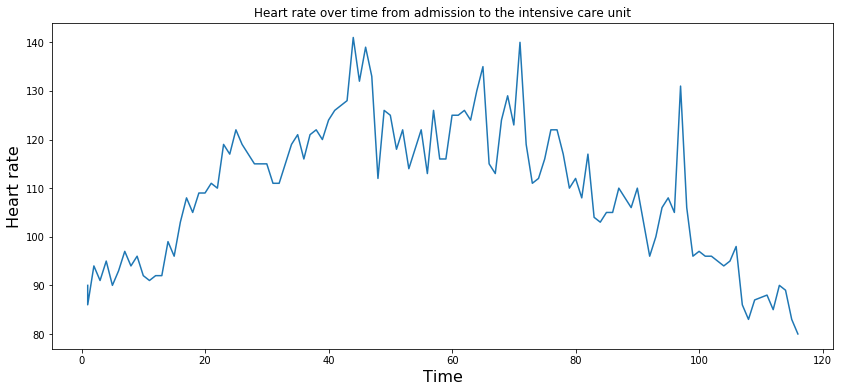

In [14]:
# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Heart Rate']

# Plot time against heart rate
plt.figure(figsize=(14, 6))
plt.plot(x_hr,y_hr)


plt.xlabel('Time',fontsize=16)
plt.ylabel('Heart rate',fontsize=16)
plt.title('Heart rate over time from admission to the intensive care unit')

### Task 1

* What is happening to this patient's heart rate?
* Plot respiratory rate over time for the patient.
* Is there anything unusual about the patient's respiratory rate?


In [15]:
# Exercise 1 here



### Plot 2: Did the patient's vital signs breach any alarm thresholds?

- Alarm systems in the intensive care unit are commonly based on high and low thresholds defined by the carer.
- False alarms are often a problem and so thresholds may be set arbitrarily to reduce alarms.
- As a result, alarm settings carry limited information.

(0, 55)

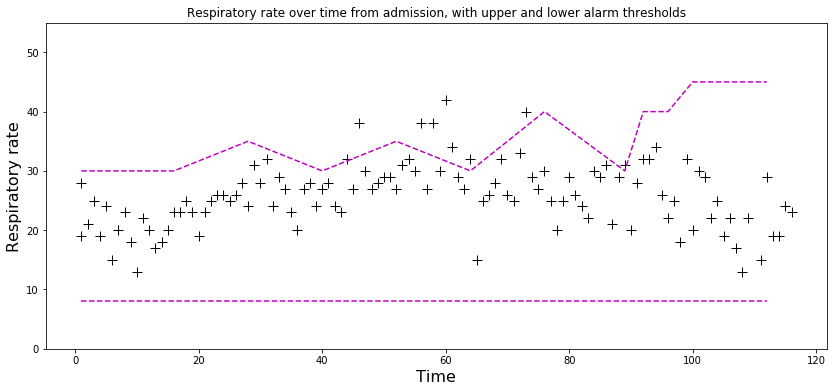

In [16]:
plt.figure(figsize=(14, 6))

plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
         'k+', markersize=10, linewidth=4)

plt.plot(ce.HOURS[ce.LABEL=='Resp Alarm - High'], 
         ce.VALUENUM[ce.LABEL=='Resp Alarm - High'],
         'm--')

plt.plot(ce.HOURS[ce.LABEL=='Resp Alarm - Low'], 
         ce.VALUENUM[ce.LABEL=='Resp Alarm - Low'],
         'm--')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Respiratory rate',fontsize=16)
plt.title('Respiratory rate over time from admission, with upper and lower alarm thresholds')
plt.ylim(0,55)


### Task 2

- Based on the data, does it look like the alarms would have triggered for this patient?


### Plot 3: What was the patient's level of consciousness?

- Glasgow Coma Scale (GCS) is a measure of consciousness.
- It is commonly used for monitoring patients in the intensive care unit. 
- It consists of three components: eye response; verbal response; motor response.

In [17]:
# Display the first few rows of the GCS eye response data
ce[ce.LABEL=='GCS - Eye Opening'].head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,UOM
20,252522,1.0,GCS - Eye Opening,Spontaneously,4.0,
55,252522,4.0,GCS - Eye Opening,Spontaneously,4.0,
92,252522,8.0,GCS - Eye Opening,To Speech,3.0,
142,252522,12.0,GCS - Eye Opening,To Speech,3.0,
180,252522,16.0,GCS - Eye Opening,Spontaneously,4.0,


(10, 165)

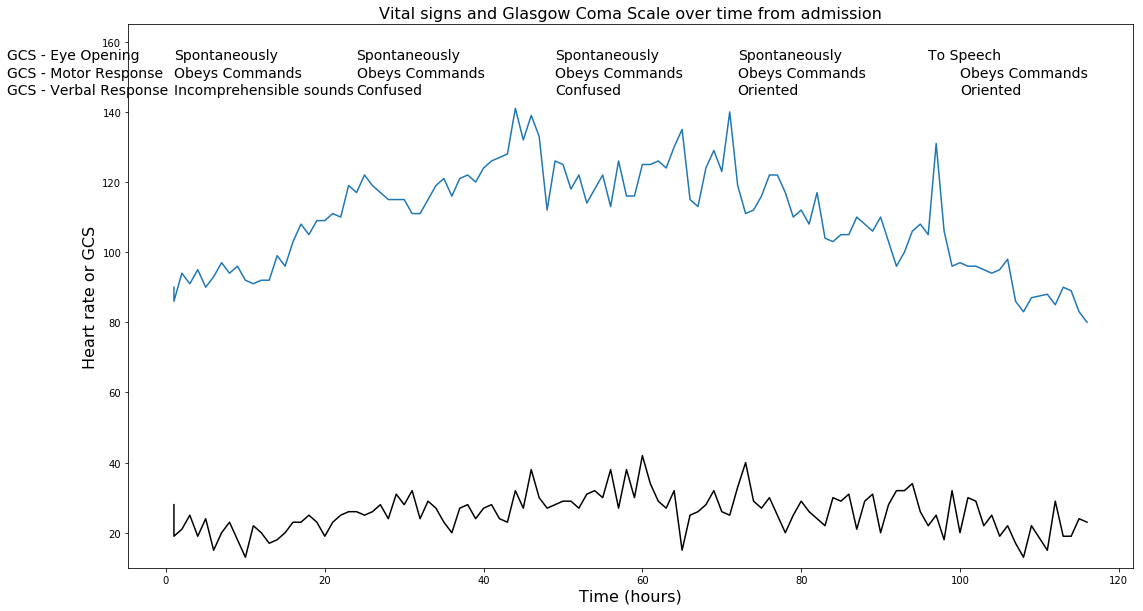

In [18]:
# Prepare the size of the figure
plt.figure(figsize=(18, 10))

# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Heart Rate']


plt.plot(x_hr,y_hr)

plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
         'k', markersize=6)

# Add a text label to the y-axis
plt.text(-20,155,'GCS - Eye Opening',fontsize=14)
plt.text(-20,150,'GCS - Motor Response',fontsize=14)
plt.text(-20,145,'GCS - Verbal Response',fontsize=14)   

# Iterate over list of GCS labels, plotting around 1 in 10 to avoid overlap
for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Eye Opening'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Eye Opening'].values[i],155),fontsize=14)
        
for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Motor Response'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Motor Response'].values[i],150),fontsize=14)

for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Verbal Response'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Verbal Response'].values[i],145),fontsize=14)

plt.title('Vital signs and Glasgow Coma Scale over time from admission',fontsize=16)

plt.xlabel('Time (hours)',fontsize=16)
plt.ylabel('Heart rate or GCS',fontsize=16)
plt.ylim(10,165)


### Task 3

- How is the patient's consciousness changing over time?

# Stop here...

### Plot 4: What other data do we have on the patient?

- Using Pandas 'read_csv function' again, we'll now load the outputevents data - this table contains all information about patient outputs (urine output, drains, dialysis).

In [19]:
# OPTION 1: load outputs from the patient
query = """
select de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0+0.5) as HOURS
  , di.label
  , de.value
  , de.valueuom
from outputevents de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
where de.subject_id = 40080
order by charttime;
"""

oe = pd.read_sql_query(query,conn)

In [20]:
oe.head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUEUOM
0,252522,1.0,Pre-Admission,60.0,mL
1,252522,4.0,Foley,80.0,mL
2,252522,5.0,Foley,60.0,mL
3,252522,6.0,Foley,60.0,mL
4,252522,7.0,Foley,60.0,mL


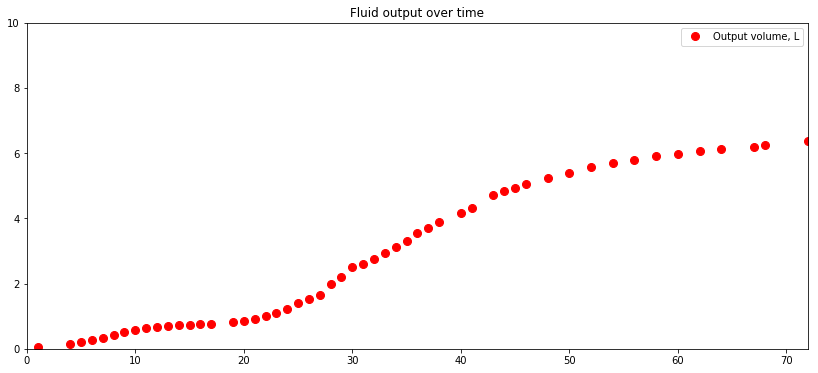

In [21]:
plt.figure(figsize=(14, 10))

plt.figure(figsize=(14, 6))
plt.title('Fluid output over time')

plt.plot(oe.HOURS, 
         oe.VALUE.cumsum()/1000, 
         'ro', markersize=8, label='Output volume, L')

plt.xlim(0,72)
plt.ylim(0,10)
plt.legend()

To provide necessary context to this plot, it would help to include patient input data. This provides the necessary context to determine a patient's fluid balance - a key indicator in patient health.

In [22]:
# OPTION 1: load inputs given to the patient (usually intravenously) using the database connection
query = """
select de.icustay_id
  , (strftime('%s',de.starttime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS_START
  , (strftime('%s',de.endtime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS_END
  , de.linkorderid
  , di.label
  , de.amount
  , de.amountuom
  , de.rate
  , de.rateuom
from inputevents_mv de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
where de.subject_id = 40080
order by endtime;
"""

ie = pd.read_sql_query(query,conn)

# # OPTION 2: load ioevents using the CSV file with endtime as the index
# ioe = pd.read_csv('inputevents.csv'
#                   ,header=None
#                   ,names=['subject_id','itemid','label','starttime','endtime','amount','amountuom','rate','rateuom']
#                   ,parse_dates=True)

In [23]:
ie.head()

,ICUSTAY_ID,HOURS_START,HOURS_END,LINKORDERID,LABEL,AMOUNT,AMOUNTUOM,RATE,RATEUOM
0,252522,3.270556,3.287222,5635057,Gastric Meds,30.000000,mL,NaN,
1,252522,3.270556,3.287222,279061,Lansoprazole (Prevacid),1.000000,dose,NaN,
2,252522,0.753889,5.253889,4337240,NaCl 0.9%,45.000001,mL,10.0,mL/hour
3,252522,7.270556,7.287222,775255,Free Water,300.000000,mL,NaN,
4,252522,3.770556,9.770556,8221764,Nutren 2.0 (Full),60.000001,mL,10.0,mL/hour


Note that the column headers are different: we have "HOURS_START" and "HOURS_END". This is because inputs are administered over a fixed period of time.

In [24]:
ie['LABEL'].unique()

array([u'Gastric Meds', u'Lansoprazole (Prevacid)', u'NaCl 0.9%',
       u'Free Water', u'Nutren 2.0 (Full)', u'Furosemide (Lasix)',
       u'Dextrose 5%', u'Norepinephrine', u'Insulin - Humalog',
       u'Metoprolol', u'Metronidazole', u'PO Intake', u'GT Flush',
       u'Morphine Sulfate'], dtype=object)

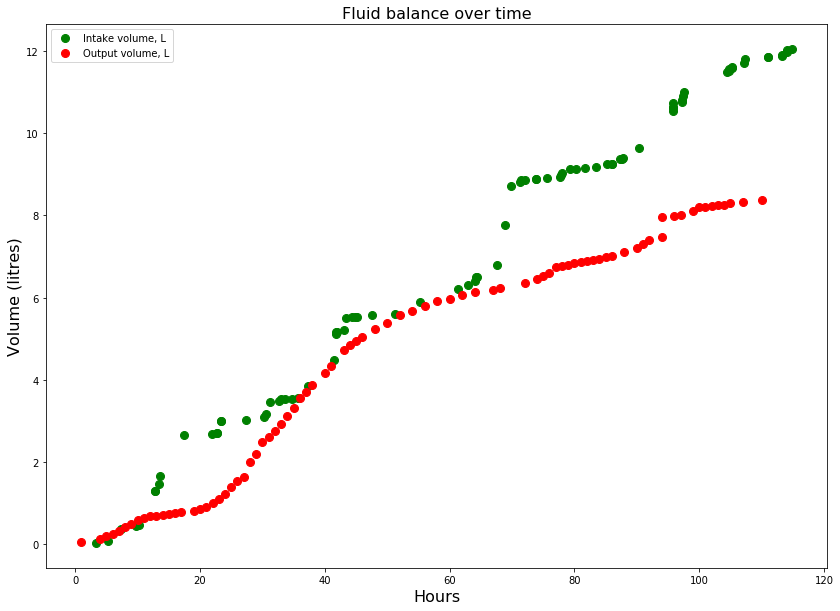

In [25]:
plt.figure(figsize=(14, 10))

# Plot the cumulative input against the cumulative output
plt.plot(ie.HOURS_END[ie.AMOUNTUOM=='mL'], 
         ie.AMOUNT[ie.AMOUNTUOM=='mL'].cumsum()/1000, 
         'go', markersize=8, label='Intake volume, L')

plt.plot(oe.HOURS, 
         oe.VALUE.cumsum()/1000, 
         'ro', markersize=8, label='Output volume, L')

plt.title('Fluid balance over time',fontsize=16)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Volume (litres)',fontsize=16)
# plt.ylim(0,38)
plt.legend()

As the plot shows, the patient's intake tends to be above their output (as one would expect!) - but there are periods where they are almost one to one. One of the biggest challenges of working with ICU data is that context is everything - let's look at a treatment (lasix) that we know will affect this graph.

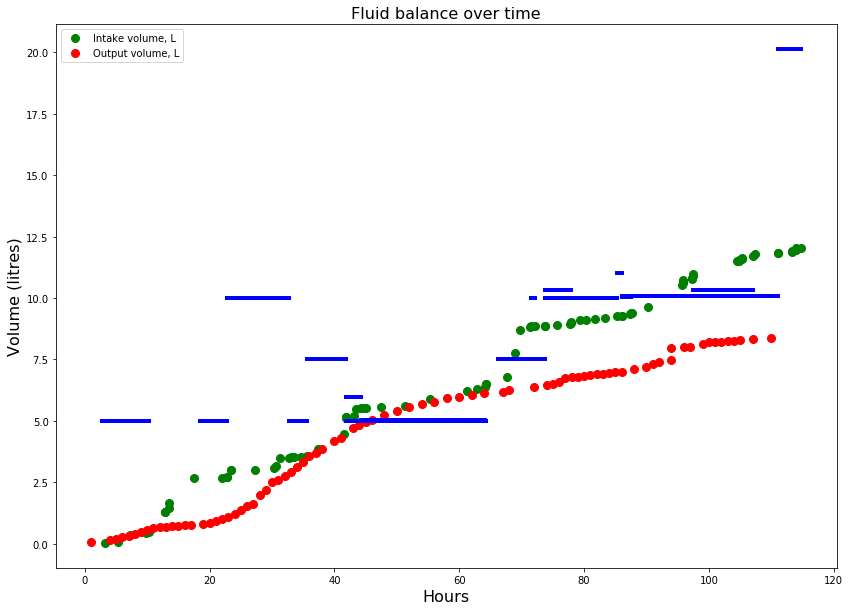

In [26]:
plt.figure(figsize=(14, 10))

# Plot the cumulative input against the cumulative output
plt.plot(ie.HOURS_END[ie.AMOUNTUOM=='mL'], 
         ie.AMOUNT[ie.AMOUNTUOM=='mL'].cumsum()/1000, 
         'go', markersize=8, label='Intake volume, L')

plt.plot(oe.HOURS, 
         oe.VALUE.cumsum()/1000, 
         'ro', markersize=8, label='Output volume, L')

# example on getting two columns from a dataframe: ie[['HOURS_START','HOURS_END']].head()

for i, idx in enumerate(ie.index[ie.LABEL=='Furosemide (Lasix)']):
    plt.plot([ie.HOURS_START[ie.LABEL=='Furosemide (Lasix)'][idx],
             ie.HOURS_END[ie.LABEL=='Furosemide (Lasix)'][idx]],
            [ie.RATE[ie.LABEL=='Furosemide (Lasix)'][idx],
             ie.RATE[ie.LABEL=='Furosemide (Lasix)'][idx]],
            'b-',linewidth=4)
    

plt.title('Fluid balance over time',fontsize=16)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Volume (litres)',fontsize=16)
# plt.ylim(0,38)
plt.legend()


In [27]:
ie['LABEL'].unique()

array([u'Gastric Meds', u'Lansoprazole (Prevacid)', u'NaCl 0.9%',
       u'Free Water', u'Nutren 2.0 (Full)', u'Furosemide (Lasix)',
       u'Dextrose 5%', u'Norepinephrine', u'Insulin - Humalog',
       u'Metoprolol', u'Metronidazole', u'PO Intake', u'GT Flush',
       u'Morphine Sulfate'], dtype=object)

### Exercise 2

* Plot the alarms for the mean arterial pressure ('```Arterial Blood Pressure mean```')
* HINT: you can use ```ce.LABEL.unique()``` to find a list of variable names
* Were the alarm thresholds breached?

In [28]:
# Exercise 2 here




### Plot 3: Were the patient's other vital signs stable?

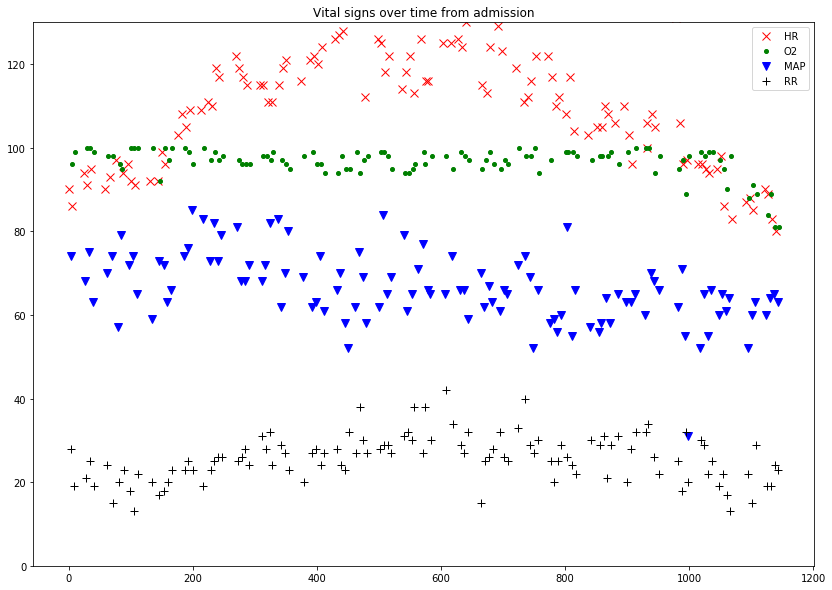

In [29]:
plt.figure(figsize=(14, 10))

plt.plot(ce.index[ce.LABEL=='Heart Rate'], 
         ce.VALUENUM[ce.LABEL=='Heart Rate'],
         'rx', markersize=8, label='HR')

plt.plot(ce.index[ce.LABEL=='O2 saturation pulseoxymetry'], 
         ce.VALUENUM[ce.LABEL=='O2 saturation pulseoxymetry'], 
         'g.', markersize=8, label='O2')

plt.plot(ce.index[ce.LABEL=='Non Invasive Blood Pressure mean'], 
         ce.VALUENUM[ce.LABEL=='Non Invasive Blood Pressure mean'], 
         'bv', markersize=8, label='MAP')

plt.plot(ce.index[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'], 
         'k+', markersize=8, label='RR')

plt.title('Vital signs over time from admission')
plt.ylim(0,130)
plt.legend()

### Plot 5: Laboratory measurements

Using Pandas 'read_csv function' again, we'll now load the labevents data.
This data corresponds to measurements made in a laboratory - usually on a sample of patient blood. 

In [30]:
# OPTION 1: load labevents data using the database connection
query = """
SELECT de.subject_id
  , de.charttime
  , di.label, de.value, de.valuenum
  , de.uom
FROM labevents de
INNER JOIN d_labitems di
  ON de.itemid = di.itemid
where de.subject_id = 40080
"""

le = pd.read_sql_query(query,conn)

# OPTION 2: load labevents from the CSV file
# le = pd.read_csv('data/example_labevents.csv', index_col='HOURSSINCEADMISSION')

In [31]:
# preview the labevents data
le.head()

,SUBJECT_ID,CHARTTIME,LABEL,VALUE,VALUENUM,UOM
0,40080,2106-05-31 13:18:00,ALANINE AMINOTRANSFERASE (ALT),10,10.0,IU/L
1,40080,2106-05-31 13:18:00,ALBUMIN,2.5,2.5,g/dL
2,40080,2106-05-31 13:18:00,ALKALINE PHOSPHATASE,126,126.0,IU/L
3,40080,2106-05-31 13:18:00,ANION GAP,12,12.0,mEq/L
4,40080,2106-05-31 13:18:00,ASPARATE AMINOTRANSFERASE (AST),28,28.0,IU/L


In [32]:
# preview the ioevents data
le[le.LABEL=='HEMOGLOBIN']

,SUBJECT_ID,CHARTTIME,LABEL,VALUE,VALUENUM,UOM
23,40080,2106-05-31 13:18:00,HEMOGLOBIN,9.1,9.1,g/dL
40,40080,2106-06-02 03:31:00,HEMOGLOBIN,8.8,8.8,g/dL
71,40080,2106-06-03 03:36:00,HEMOGLOBIN,8.2,8.2,g/dL
105,40080,2106-06-04 03:43:00,HEMOGLOBIN,8.2,8.2,g/dL
150,40080,2106-06-01 03:38:00,HEMOGLOBIN,8.3,8.3,g/dL
214,40080,2106-06-05 04:57:00,HEMOGLOBIN,8.5,8.5,g/dL


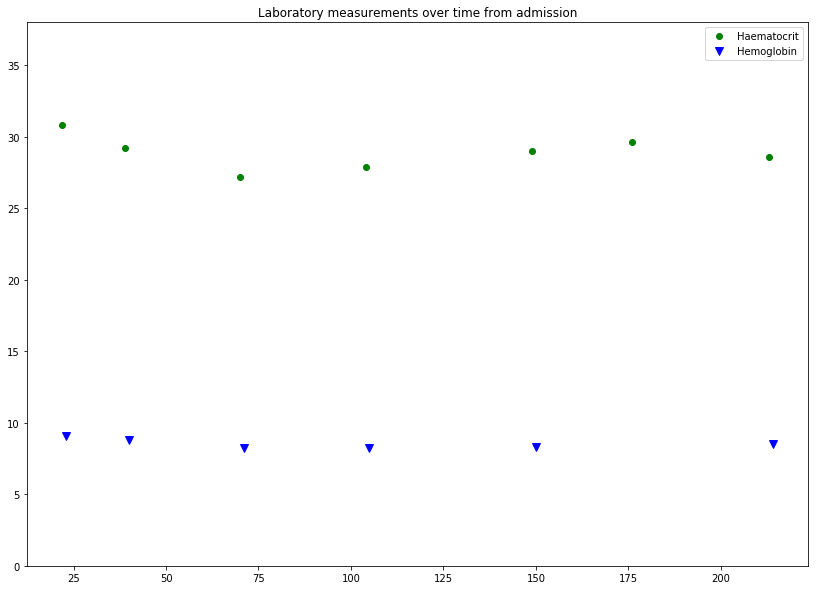

In [33]:
plt.figure(figsize=(14, 10))

plt.plot(le.index[le.LABEL=='HEMATOCRIT'], 
         le.VALUENUM[le.LABEL=='HEMATOCRIT'], 
         'go', markersize=6, label='Haematocrit')

plt.plot(le.index[le.LABEL=='HEMOGLOBIN'], 
         le.VALUENUM[le.LABEL=='HEMOGLOBIN'], 
         'bv', markersize=8, label='Hemoglobin')

plt.title('Laboratory measurements over time from admission')
plt.ylim(0,38)
plt.legend()

# Prediction model

In [293]:
query = """

with t1 as -- all time steps
(

SELECT distinct de.subject_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0) as HOURS
FROM chartevents de
INNER join icustays ie
ON de.subject_id = ie.subject_id
order by de.subject_id, charttime

), t2 as  -- po2
(
SELECT de.subject_id
  --, de.charttime
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
 -- , di.label, de.value
  ,de.valuenum as po2
  --, de.uom
FROM labevents de
INNER JOIN d_labitems di
  ON de.itemid = di.itemid
INNER join icustays ie
ON de.subject_id = ie.subject_id
where label = 'PO2'
order by de.subject_id, hours

), t3 as  -- spo2
(
with t1 as
(SELECT de.subject_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
  , de.valuenum
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.subject_id = ie.subject_id
WHERE label = 'O2 saturation pulseoxymetry'
ORDER BY charttime)
select subject_id, hours, avg(valuenum) as spo2
from t1
group by subject_id, hours
order by subject_id, hours
), t4 as -- map
(
with t1 as
(SELECT de.subject_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
  , de.valuenum
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE label = 'Non Invasive Blood Pressure mean'
ORDER BY charttime)
select subject_id, hours, avg(valuenum) as map
from t1
group by subject_id, hours
order by subject_id, hours

)

select t1.*, t2.po2 as po2,t4.map as map, t3.spo2 as spo2
from t1, t2, t3, t4
where t1.subject_id=t2.subject_id and t1.subject_id=t3.subject_id   and t1.subject_id=t4.subject_id   and t4.hours>=t1.hours-2 and t4.hours<=t1.hours+2  and t2.hours>=t1.hours-2  and t2.hours<=t1.hours+2 and t1.hours=t3.hours"""
    
uo = pd.read_sql_query(query,conn)




X=uo.drop('subject_id', axis = 1)
X=X.drop('HOURS',axis=1)
Y=uo.spo2
#X=uo.po2
#drop('intake',axis=1)  
feature_list = list(X.columns)
uo.head()
len(uo)
    

729

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import matplotlib


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain , Ytest = train_test_split(X,Y, test_size = 0.2, random_state = 1)

print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', Ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', Ytest.shape)

#Xtest.head()

clf = LogisticRegression()
clf.fit(Xtrain,Ytrain.astype('int'))

# Use the forest's predict method on the test data
predictions = clf.predict(Xtest)
# Calculate the absolute errors
#roc=roc_auc_score(Ytest, predictions)
#print roc

clf = KNeighborsClassifier()
clf.fit(Xtrain,Ytrain.astype('int'))

# Use the forest's predict method on the test data
predictions = clf.predict(Xtest)
# Calculate the absolute errors
#roc=roc_auc_score(Ytest, predictions)
#print roc

rf = RandomForestClassifier()#n_estimators=100, oob_score=True,n_jobs=5, random_state=0)
rf.fit(Xtrain,Ytrain.astype('int'))

# Use the forest's predict method on the test data
predictions = rf.predict(Xtest)
# Calculate the absolute errors
#roc=roc_auc_score(Ytest, predictions)
#print roc



errors = abs(predictions - Ytest)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'mL of intake')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Ytest)
#print mape
mape[mape>1E4]=0
#mape[mape<-1E3]=0
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
#print mape
print('Accuracy:', round(accuracy, 2), '%.')


#confusion_matrix(Ytest, predictions)

('Training Features Shape:', (583, 3))
('Training Labels Shape:', (583L,))
('Testing Features Shape:', (146, 3))
('Testing Labels Shape:', (146L,))
('Mean Absolute Error:', 0.42, 'mL of intake')
('Accuracy:', 99.56, '%.')


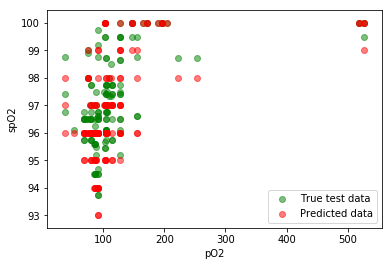

In [302]:
plt.scatter(Xtest.po2, Ytest, c="g", alpha=0.5, label="True test data")
plt.scatter(Xtest.po2, predictions, c="r", alpha=0.5, label="Predicted data")

plt.xlabel("pO2")
plt.ylabel("spO2")
plt.legend(loc=4)
plt.show()

In [279]:
ce = pd.read_csv('C:/Users/mk5414/desktop/demo_tmu.csv')

X=ce
Y=X.mortality_90d
X=ce.drop('mortality_90d', axis = 1)
feature_list = list(X.columns)
X.head()
#print(len(X))

,gender,age,elixhauser,GCS,HR,MeanBP,RR,FiO2_1,Potassium,Sodium,...,Hb,Platelets_count,Arterial_pH,paO2,Arterial_BE,Arterial_lactate,mechvent,Shock_Index,cumulated_balance_tev,SOFA
0,0,30946,2.0,3,67.071429,77.357165,10.285714,0.400000,4.200000,144.000000,...,11.700000,130.000000,7.450000,179.00,0.000000,0.9,1,0.570474,960.0000,5
1,0,11203,2.0,15,118.000000,83.000000,33.000000,0.409214,3.400000,132.000000,...,10.900000,154.000000,7.489500,200.65,7.050000,2.0,0,0.936508,800.0000,4
2,0,31032,3.0,13,84.000000,120.000000,12.000000,0.571680,5.266667,136.000000,...,11.200000,265.000000,7.484000,130.80,7.600000,2.9,0,0.407767,0.0000,7
3,0,13540,5.0,3,89.000000,74.000000,9.000000,1.000000,4.800000,139.333333,...,13.100000,189.000000,7.253333,261.00,-2.666667,1.6,1,0.872549,0.0000,12
4,1,30550,3.0,15,77.607143,67.928571,22.107143,0.500000,4.800000,132.000000,...,11.357143,138.071429,7.330000,114.00,-9.000000,2.1,1,0.809010,-366.6362,9


In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain , Ytest = train_test_split(X,Y, test_size = 0.2, random_state = 1)

print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', Ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', Ytest.shape)

#Xtest.head()

clf = LogisticRegression()
clf.fit(Xtrain,Ytrain.astype('int'))

# Use the forest's predict method on the test data
predictions = clf.predict(Xtest)
# Calculate the absolute errors
roc=roc_auc_score(Ytest, predictions)
print roc

clf = KNeighborsClassifier()
clf.fit(Xtrain,Ytrain.astype('int'))

# Use the forest's predict method on the test data
predictions = clf.predict(Xtest)
# Calculate the absolute errors
roc=roc_auc_score(Ytest, predictions)
print roc

rf = RandomForestClassifier()#n_estimators=100, oob_score=True,n_jobs=5, random_state=0)
rf.fit(Xtrain,Ytrain.astype('int'))

# Use the forest's predict method on the test data
predictions = rf.predict(Xtest)
# Calculate the absolute errors
roc=roc_auc_score(Ytest, predictions)
print roc

confusion_matrix(Ytest, predictions)


('Training Features Shape:', (24, 3))
('Training Labels Shape:', (24L,))
('Testing Features Shape:', (7, 3))
('Testing Labels Shape:', (7L,))


ValueError: continuous format is not supported

In [281]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
print feature_importances

[('age', 0.09), ('Platelets_count', 0.07), ('RR', 0.06), ('HR', 0.05), ('MeanBP', 0.05), ('Potassium', 0.05), ('Sodium', 0.05), ('Albumin', 0.05), ('Hb', 0.05), ('Arterial_pH', 0.05), ('paO2', 0.05), ('Arterial_BE', 0.05), ('Arterial_lactate', 0.05), ('Shock_Index', 0.05), ('cumulated_balance_tev', 0.05), ('Creatinine', 0.04), ('elixhauser', 0.03), ('GCS', 0.03), ('FiO2_1', 0.03), ('SOFA', 0.03), ('gender', 0.01), ('mechvent', 0.01)]


This dataset is not suitable to build mortality prediction models. Instead, let's try something with the available data: 
can we predict urine output given fluid intake and diastolic blood pressure?

In [231]:
query = """
with t1 as -- all time steps
(

SELECT distinct de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0) as HOURS
FROM chartevents de
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
order by de.icustay_id, charttime

), t2 as  -- bp
(
with t1 as
(SELECT de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
  , de.valuenum
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE label = 'Non Invasive Blood Pressure mean'
ORDER BY charttime)
select icustay_id, hours, avg(valuenum) as dbp
from t1
group by icustay_id, hours
order by icustay_id, hours

), t3 as  -- intake
(
with t1 as(
select de.icustay_id
  , round((strftime('%s',de.endtime)-strftime('%s',ie.intime))/60/120+2) as HOURS  -- intake recorded 1h before, for matching with uo
  , de.amount
from inputevents_mv de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
where de.amountuom='mL'
order by de.icustay_id,endtime
) select icustay_id, hours, sum(amount) as intake
from t1
group by icustay_id, hours
order by icustay_id, hours

), t4 as  -- UO
(
with t1 as
(select de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
  , de.value
from outputevents de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
order by de.icustay_id, charttime
) select icustay_id, hours, sum(value) as uo
from t1
group by icustay_id, hours
order by icustay_id, hours

), t5 as -- creat
(
with t1 as
(SELECT de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0) as HOURS
  , de.valuenum
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE label = 'Creatinine'
ORDER BY charttime)
select icustay_id, hours, avg(valuenum) as creat
from t1
group by icustay_id, hours
order by icustay_id, hours
)

select t1.*, t2.dbp,t3.intake,t5.creat,t4.uo
from t1, t2, t3, t4, t5
where t1.icustay_id=t2.icustay_id and t1.icustay_id=t3.icustay_id and t1.icustay_id=t4.icustay_id and t1.icustay_id=t5.icustay_id  and t1.hours=t2.hours and t1.hours=t3.hours and t1.hours=t4.hours and t1.hours>=t5.hours and t1.hours<=t5.hours+12
"""
    
uo = pd.read_sql_query(query,conn)

uo.head()
##len(uo)
#Y=uo[,4]
#Y=np.array(uo,'uo')
#uo[:,4]

X=uo.drop('icustay_id', axis = 1)
X=X.drop('HOURS',axis=1)
Y=X.intake
X=X.drop('intake',axis=1)  
feature_list = list(X.columns)

#len(Y)
#print uo
#Y[Y>500]=500
#np.max(Y)
#X.head()
#print feature_list
uo.head()

,icustay_id,HOURS,dbp,intake,creat,uo
0,232646,2.0,107.5,37.649033,0.5,155.0
1,232646,3.0,107.5,100.000002,0.5,75.0
2,232646,5.0,107.0,117.242251,0.5,190.0
3,232646,6.0,105.0,236.174689,0.5,75.0
4,232646,8.0,89.0,371.997738,0.5,45.0


In [ ]:
X=uo.drop('icustay_id', axis = 1)
X=X.drop('HOURS',axis=1)
Y=X.uo
X=X.drop('uo',axis=1)  
feature_list = list(X.columns)

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=123456)
clf = LogisticRegression()

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain , Ytest = train_test_split(X,Y, test_size = 0.25, random_state = 1)

print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', Ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', Ytest.shape)

Xtest.head()

rf.fit(Xtrain,Ytrain.astype('int'))
clf

# Use the forest's predict method on the test data
predictions = rf.predict(Xtest)
# Calculate the absolute errors
roc=roc_auc_score(Ytest, predictions)
print roc

errors = abs(predictions - Ytest)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'mL of intake')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Ytest)
#print mape
mape[mape>1E4]=0
#mape[mape<-1E3]=0
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print mape
print('Accuracy:', round(accuracy, 2), '%.')


('Training Features Shape:', (375, 22))
('Training Labels Shape:', (375L,))
('Testing Features Shape:', (125, 22))
('Testing Labels Shape:', (125L,))
0.5
('Mean Absolute Error:', 0.29, 'mL of intake')
304      NaN
340      NaN
47     100.0
67     100.0
479      NaN
485    100.0
310      NaN
31     100.0
249      NaN
90       NaN
322      NaN
168      NaN
119      NaN
66       NaN
305      NaN
189      NaN
434      NaN
289      NaN
142      NaN
146      NaN
293      NaN
312    100.0
311      NaN
492    100.0
65       NaN
374    100.0
34     100.0
342    100.0
173      NaN
201      NaN
       ...  
11     100.0
192      NaN
92       NaN
221      NaN
110    100.0
238    100.0
438      NaN
475      NaN
58       NaN
380      NaN
78       NaN
379      NaN
247      NaN
207      NaN
101      NaN
344      NaN
392      NaN
423      NaN
488      NaN
256      NaN
180      NaN
436    100.0
18       NaN
40       NaN
421      NaN
469    100.0
41       NaN
159    100.0
286    100.0
132      NaN
Name: 

[('age', 0.09), ('Platelets_count', 0.07), ('RR', 0.06), ('HR', 0.05), ('MeanBP', 0.05), ('Potassium', 0.05), ('Sodium', 0.05), ('Albumin', 0.05), ('Hb', 0.05), ('Arterial_pH', 0.05), ('paO2', 0.05), ('Arterial_BE', 0.05), ('Arterial_lactate', 0.05), ('Shock_Index', 0.05), ('cumulated_balance_tev', 0.05), ('Creatinine', 0.04), ('elixhauser', 0.03), ('GCS', 0.03), ('FiO2_1', 0.03), ('SOFA', 0.03), ('gender', 0.01), ('mechvent', 0.01)]


In [158]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X, Y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

ImportError: No module named pydot

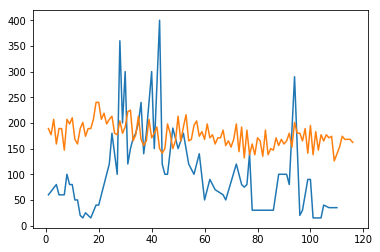

In [35]:
import pandas as pd

x1 = ce.HOURS[ce.LABEL=='Non Invasive Blood Pressure diastolic']
y1 = ce.VALUENUM[ce.LABEL=='Non Invasive Blood Pressure diastolic']
x2=oe.HOURS
y2=oe.VALUE

d = {'x1': x1, 'y1': y1}
df = pd.DataFrame(data=d)

#df=pd.DataFrame([x1 y1], columns=['x1','y1'])
#df.head()
bp=df.groupby(['x1']).mean()

d = {'x2': x2, 'y2': y2}
df = pd.DataFrame(data=d)
uo=df.groupby(['x2']).mean()

#plt.plot(bp.x1,bp.y1*3)
#plt.plot(uo.x2,uo.y2)

#bp.head()
plt.plot(uo['y2'])
plt.plot(bp['y1']*3)

In [119]:

# Set x equal to the times
x1 = list(ce.HOURS[ce.LABEL=='Non Invasive Blood Pressure diastolic'])

# Set y equal to the heart rates
y1 = ce.VALUENUM[ce.LABEL=='Non Invasive Blood Pressure diastolic']

x2=list(oe.HOURS)
y2=oe.VALUE

print y2

x2[y2>250]=50
#y1[y2>250]=float('nan')
y2[y2>250]=float('nan')
    
#plt.plot(x1,y1*3)
#plt.plot(x2,y2)

#len(x2)
i=list(set(x1) & set(x2)) #intersection of the 2 lists of hours
#print x1,x2,i

da=np.zeros((200,3))

for j in range(0, len(i)):
    #print(i[j]
    ii=x1.index(i[j])
    da[ii,1]=x1[i]
  #  ii=x2.index(i[j])
  #   da[ii,2]=x2[i[j]] 
                
#print i

0      60.0
1      80.0
2      60.0
3      60.0
4      60.0
5     100.0
6      80.0
7      80.0
8      50.0
9      50.0
10     20.0
11     15.0
12     25.0
13     20.0
14     15.0
15     40.0
16     40.0
17     60.0
18     80.0
19    100.0
20    120.0
21    180.0
22    140.0
23    100.0
24      NaN
25    200.0
26      NaN
27    120.0
28    150.0
29    170.0
      ...  
53     80.0
54     75.0
55     80.0
56    140.0
57     30.0
58     30.0
59     30.0
60     30.0
61     30.0
62     30.0
63     30.0
64     30.0
65     30.0
66    100.0
67    100.0
68    100.0
69     80.0
70     80.0
71      NaN
72     20.0
73     30.0
74     90.0
75     90.0
76     15.0
77     15.0
78     15.0
79     15.0
80     40.0
81     35.0
82     35.0
Name: VALUE, Length: 83, dtype: float64


TypeError: list indices must be integers, not Series

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(np.array(x2).reshape(-1,1), np.array(y2))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [64]:
query = """
select de.icustay_id
  , (strftime('%s',de.starttime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS_START
  , (strftime('%s',de.endtime)-strftime('%s',ie.intime))/60.0/60.0 as HOURS_END
  , de.amount
  , de.amountuom
  , de.rate
  , de.rateuom
from inputevents_mv de 
inner join icustays ie
  on de.icustay_id = ie.icustay_id
inner join d_items di
  on de.itemid = di.itemid
where de.subject_id = 40080
order by endtime;
"""

ie = pd.read_sql_query(query,conn)
ie.head()

# s=ie.AMOUNT[ie.AMOUNTUOM=='mL'].cumsum()
print(s)
 

0         30.000000
2         75.000001
3        375.000001
4        435.000002
6        472.500003
7       1284.999990
8       1289.166657
9       1472.466644
10      1659.966637
11      2659.966596
13      2694.475225
15      2715.641892
17      2715.808559
18      2988.141898
19      2988.708384
20      3018.708384
24      3094.041389
26      3172.874733
27      3472.874733
29      3497.208067
31      3528.247080
33      3530.427036
35      3538.515008
38      3553.181675
39      3853.181675
40      4480.848690
42      5108.515377
44      5155.015381
46      5155.098714
48      5202.441629
           ...     
103     9175.692825
105     9250.127433
107     9258.212851
109     9258.380708
111     9358.380708
113     9374.260708
115     9391.717861
117     9631.717861
118    10544.893583
119    10604.893583
120    10634.893583
122    10734.893583
124    10764.893583
125    10794.893583
127    10894.293586
129    10994.336501
131    11490.336517
132    11520.336517
133    11550.336517
